In [5]:
import torch
import torchaudio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Grab an example audio file
from torch.hub import download_url_to_file
download_url_to_file('https://models.silero.ai/vad_models/en.wav', 'en_example.wav')

  0%|          | 0.00/1.83M [00:00<?, ?B/s]

## Loading Audio

In [2]:
example_file = 'en_example.wav'

waveform, sample_rate = torchaudio.load(example_file)
print(waveform.shape, sample_rate)

torch.Size([1, 960000]) 16000


## Matplotlib function

In [6]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)

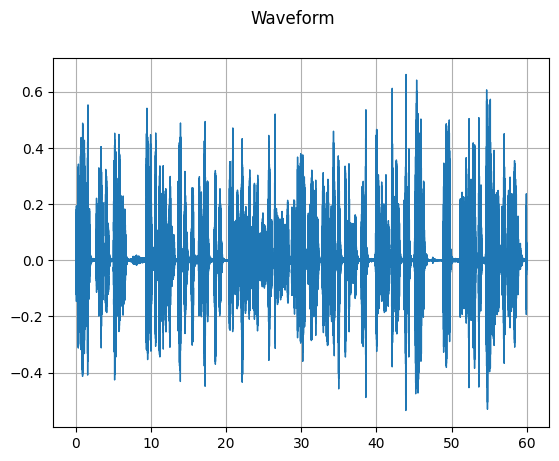

In [7]:
plot_waveform(waveform, sample_rate)

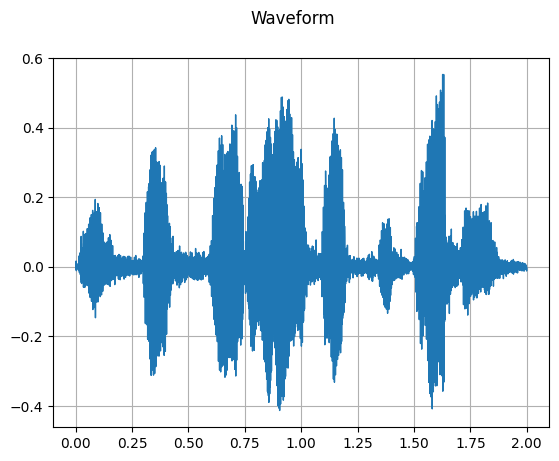

In [30]:
plot_waveform(waveform[:, 0:sample_rate*2], sample_rate)

In [29]:
from IPython.display import Audio

Audio(waveform[:, 0:sample_rate*2], rate=sample_rate)

In [33]:
def get_segment(waveform, sample_rate, start, end):
    return waveform[:, sample_rate*start:sample_rate*end]



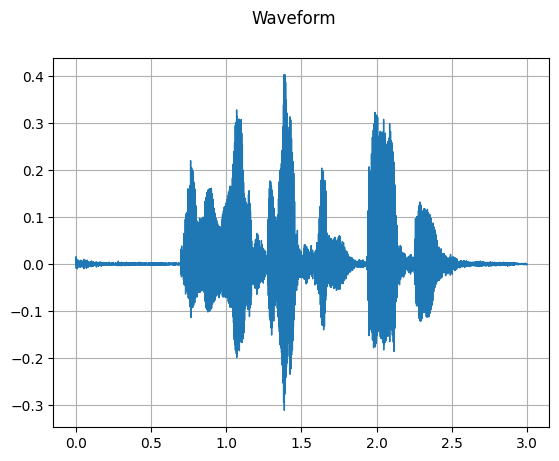

In [49]:
clip = get_segment(waveform, sample_rate, 2, 5)
plot_waveform(clip, sample_rate)
Audio(clip, rate=sample_rate)